<a href="https://colab.research.google.com/github/bwsi-hadr/final_exercise_student/blob/master/Final_exercise_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
!sudo mkdir -p /etc/pki/tls/certs
!sudo cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
try:
  import rasterio
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/BWSI-Remote-Sensing/'Final_exercise'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BWSI-Remote-Sensing/Final_exercise


In [3]:
!ls game_grid_export

facilities    flooding.prj  game_grid_all_stats.cpg  game_grid_all_stats.shp
flooding.cpg  flooding.shp  game_grid_all_stats.dbf  game_grid_all_stats.shx
flooding.dbf  flooding.shx  game_grid_all_stats.prj


In [0]:
game_grid = gpd.read_file('game_grid_export/game_grid_all_stats.shp')

In [0]:
flooding = gpd.read_file('game_grid_export/flooding.shp')

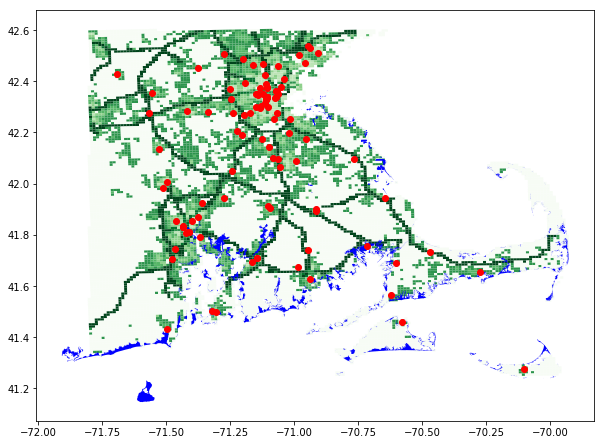

In [18]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
game_grid.plot(ax=ax, column='Transporta',cmap='Greens')
flooding.to_crs(game_grid.crs).plot(color='blue', ax = ax, zorder=10)
hospitals.to_crs(game_grid.crs).plot(color='red', ax=ax, zorder=15)

In [0]:
hospitals = gpd.read_file('game_grid_export/facilities/hospitals.shp')

In [19]:
hospitals

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,WEBSITE,OWNER,TTL_STAFF,BEDS,HELIPAD,geometry
0,18.0,0006002401,VA MEDICAL CENTER - BROCKTON DIVISION,940 BELMONT ST,BROCKTON,MA,02401,MILITARY,OPEN,PLYMOUTH,25023,USA,42.063022,-71.053936,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.05393558885629 42.06302243024101 0)
1,20.0,0006802132,VA MEDICAL CENTER - WEST ROXBURY DIVISION,1400 VFW PKY,WEST ROXBURY,MA,02132,MILITARY,OPEN,SUFFOLK,25025,USA,42.274627,-71.171698,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.1716980219461 42.27462729771167 0)
2,24.0,0001102908,PROVIDENCE VA MEDICAL CENTER,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.831937,-71.433575,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,73.0,NOT AVAILABLE,POINT Z (-71.43357465005005 41.831936947732 0)
3,25.0,0001702896,REHABILITATION HOSPITAL OF RHODE ISLAND,116 EDDIE DOWLING HIGHWAY,NORTH SMITHFIELD,RI,02896,REHABILITATION,OPEN,PROVIDENCE,44007,USA,41.981578,-71.512844,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.rhri.net/home.aspx,PROPRIETARY,-999.0,70.0,NOT AVAILABLE,POINT Z (-71.51284391331592 41.98157825912944 0)
4,26.0,0000902920,ELEANOR SLATER HOSPITAL,3 REGAN COURT,CRANSTON,RI,02920,PSYCHIATRIC,OPEN,PROVIDENCE,44007,USA,41.744705,-71.463225,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bhddh.ri.gov/esh/index.php,GOVERNMENT - STATE,-999.0,495.0,Y,POINT Z (-71.46322471694708 41.74470515541861 0)
5,27.0,0001602841,"NAVAL HEALTH CLINIC NEW ENGLAND, NEWPORT",43 SMITH ROAD,NEWPORT,RI,02841,GENERAL ACUTE CARE,OPEN,NEWPORT,44005,USA,41.503931,-71.321796,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://nhcne.med.navy.mil/locations/npri/npri.asp,GOVERNMENT - FEDERAL,-999.0,100.0,NOT AVAILABLE,POINT Z (-71.32179613138629 41.50393052197609 0)
6,28.0,0013402908,VA MEDICAL CENTER - PROVIDENCE,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.832139,-71.433150,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.43314954501545 41.8321390838517 0)
7,29.0,0001802886,KENT HOSPITAL,455 TOLL GATE ROAD,WARWICK,RI,02886,GENERAL ACUTE CARE,OPEN,KENT,44003,USA,41.705248,-71.478236,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.kentri.org/,NON-PROFIT,-999.0,306.0,Y,POINT Z (-71.47823583631475 41.70524808503114 0)
8,30.0,0000302860,MEMORIAL HOSPITAL OF RHODE ISLAND,111 BREWSTER STREET,PAWTUCKET,RI,02860,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.869922,-71.376456,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.mhri.org/,NON-PROFIT,-999.0,294.0,NOT AVAILABLE,POINT Z (-71.37645644510883 41.8699220005999 0)
9,31.0,0000602895,LANDMARK MEDICAL CENTER,115 CASS AVE,WOONSOCKET,RI,02895,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,42.004612,-71.495803,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.landmarkmedical.org/,NON-PROFIT,-999.0,214.0,Y,POINT Z (-71.49580333435637 42.00461190311688 0)
